In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


import seaborn as sns




In [2]:
def read_data_from_csv(dir_path):
    all_files = []
    data_main = pd.DataFrame()
    for dirname, _, filenames in os.walk(dir_path):
        for filename in filenames: 
            all_files.append(os.path.join(dirname,filename))
    all_files.sort()     
    
    data_main = pd.DataFrame()
    with tqdm(total=len(all_files)) as pbar:
        for file in all_files:
            data_main = pd.concat([data_main,pd.read_csv(file, encoding='unicode_escape')], ignore_index=True)
            pbar.update(1)
    return data_main

## Game Streaming

In [3]:
data_geforce = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Game_Streaming/GeForce_Now')

100%|██████████| 9/9 [00:46<00:00,  5.13s/it]


In [5]:
data_geforce.head()
data_geforce['Time'] = pd.to_datetime(data_geforce['Time'])


In [4]:
data_ktgamebox = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Game_Streaming/KT_GameBox')

100%|██████████| 10/10 [00:30<00:00,  3.03s/it]


## Live Streaming

In [5]:

data_afreecatv = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Live_Streaming/AfreecaTV')

100%|██████████| 2/2 [00:28<00:00, 14.25s/it]


In [6]:
data_navernow = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Live_Streaming/Naver_NOW')


100%|██████████| 4/4 [01:34<00:00, 23.65s/it]


In [7]:
data_youtubelive = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Live_Streaming/YouTube_Live')

100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


## Metaverse

In [8]:

data_roblox = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Metaverse/Roblox')


100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


In [9]:
data_zepeto = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Metaverse/Zepeto')


100%|██████████| 10/10 [00:01<00:00,  7.26it/s]


## Online Gaming

In [10]:
data_battleground = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Online_Game/Battleground')

100%|██████████| 9/9 [00:02<00:00,  3.15it/s]


In [11]:
data_teamtactics = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Online_Game/Teamfight_Tactics')

100%|██████████| 9/9 [00:01<00:00,  5.25it/s]


## Storead Streaming

In [12]:

data_netflix = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Stored_Streaming/Netflix')


100%|██████████| 1/1 [00:04<00:00,  4.92s/it]


In [13]:
data_youtube = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Stored_Streaming/YouTube')


100%|██████████| 1/1 [00:06<00:00,  6.91s/it]


## Video Confrencing

In [14]:

data_googlemeet = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Video_Conferencing/Google_Meet')


100%|██████████| 1/1 [00:40<00:00, 40.80s/it]


In [15]:
data_msteams= read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Video_Conferencing/MS_Teams')


100%|██████████| 2/2 [00:25<00:00, 12.87s/it]


In [16]:
data_zoom = read_data_from_csv('/Users/navnitkumar/Documents/ML /DataSet/data/5G_Traffic_Datasets/raw/Video_Conferencing/Zoom')


100%|██████████| 3/3 [00:21<00:00,  7.31s/it]


## Creating a Single DS for storing all the data

In [ ]:
total_dfs = [
    data_geforce,
    data_ktgamebox,
    data_afreecatv,
    data_navernow,
    data_youtubelive,
    data_roblox,
    data_zepeto,
    data_battleground,
    data_teamtactics,
    data_netflix,
    data_youtube,
    data_googlemeet,
    data_msteams,
    data_zoom
]

fileNames = [
    'geforce',
    'ktgamebox',
    'afreecatv',
    'navernow',
    'youtubelive',
    'roblox',
    'zepeto',
    'battleground',
    'teamtactics',
    'netflix',
    'youtube',
    'googlemeet',
    'msteams',
    'zoom'
]


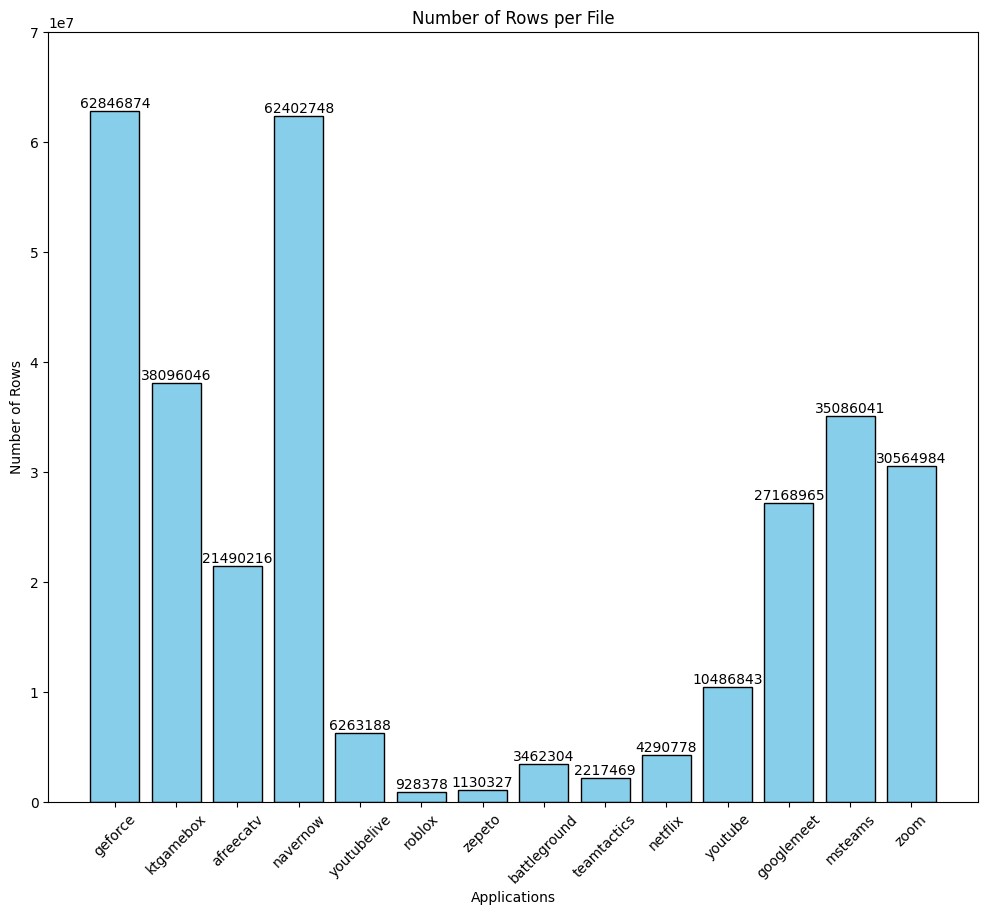

In [20]:


# Calculate the number of rows for each DataFrame
row_counts = [x.shape[0] for x in total_dfs]

# Adjust figure size
plt.figure(figsize=(12, 10))

# Plot the bar chart
bars = plt.bar(fileNames, row_counts, color='skyblue',edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(yval), ha='center', va='bottom', fontsize=10)


# Customize the y-axis ticks to increments of 10,000
y_max = max(row_counts)  # Find the maximum row count
yticks = np.arange(0, y_max + 10000000, 10000000)
plt.yticks(yticks)

# Customize labels and title
plt.xlabel('Applications')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per File')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Group the data in chunk of 32

In [34]:

data_set = pd.concat(total_dfs,ignore_index= True)



KeyboardInterrupt: 

KeyboardInterrupt: 

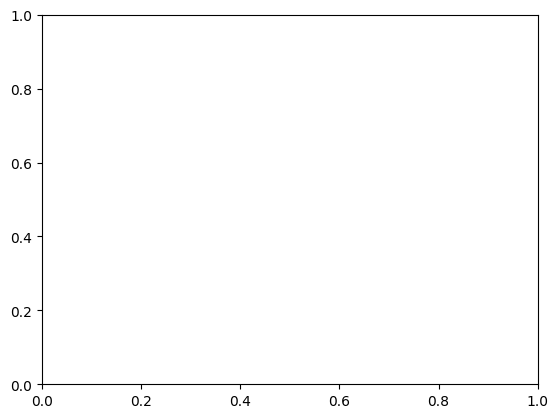

In [ ]:
# sns.countplot(x='diabetes', data=df)
# plt.title('Outcome Count Plot')
# plt.show()




In [32]:
protocol_counts = data_set['Protocol'].value_counts()

In [ ]:
# Plot bar chart
plt.figure(figsize=(12, 10))
bars = plt.bar(protocol_counts.index, protocol_counts.values, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Protocols')
plt.ylabel('Counts')
plt.title('Counts of Protocols in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
y_max = max(protocol_counts.values)
step_size = 2  # Define smaller step size
plt.yticks(np.arange(0, y_max + step_size, step_size))
# Show plot
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1171e0ca0> (for post_execute):


KeyboardInterrupt: 

In [18]:
from tqdm import tqdm 

WINDOW_SIZE = 60
with tqdm(total=len(total_dfs)) as pbar:
    for dfs in total_dfs:
        dfs['group_num'] = (dfs.index // WINDOW_SIZE) + 1
        pbar.update(1)

100%|██████████| 14/14 [00:01<00:00,  8.72it/s]


## Select only 10000 groups / file

In [179]:
new_total_dfs = []
with tqdm(total=len(total_dfs)) as pbar:
    for dfs in total_dfs:
        new_df = dfs[dfs['group_num'] <= 5000]
        new_total_dfs.append(new_df)
        pbar.update(1)

100%|██████████| 14/14 [00:00<00:00, 16.91it/s]


In [20]:
with tqdm(total=len(total_dfs)) as pbar:
    for dfs in total_dfs:
        dfs['Time'] = pd.to_datetime(dfs['Time'])
        pbar.update(1)


100%|██████████| 14/14 [01:36<00:00,  6.88s/it]


In [21]:
unique_protocols = set()
for i in range(len(fileNames)):
    # print(fileNames[i])
    # print(new_total_dfs[i]['Protocol'].unique())
    unique_protocols.update(total_dfs[i]['Protocol'].unique())

In [22]:
unique_protocols


{'0x0000',
 '? KNXnet/IP',
 'ATH',
 'CLASSIC-STUN',
 'CLTP',
 'DB-LSP',
 'DCERPC',
 'DCP-AF',
 'DCP-PFT',
 'DNS',
 'DTLSv1.2',
 'ENIP',
 'Elasticsearch',
 'FMTP',
 'GQUIC',
 'H1',
 'HCrt',
 'HTTP',
 'HTTP/JSON',
 'ICMP',
 'KINK',
 'MANOLITO',
 'MPEG TS',
 'NXP 802.15.4 SNIFFER',
 'PNIO',
 'Pathport',
 'Q.931',
 'QUIC',
 'R-GOOSE',
 'RTCP',
 'RakNet',
 'SMPP',
 'SSL',
 'SSLv2',
 'STUN',
 'TC-NV',
 'TCP',
 'TFTP',
 'THRIFT',
 'TLSv1',
 'TLSv1.2',
 'TLSv1.3',
 'TPKT',
 'TURN CHANNEL',
 'TZSP',
 'UDP',
 'WireGuard',
 'ar_drone'}

In [25]:
for i in unique_protocols:
    print(i+',random,'+'random')

QUIC,random,random
HTTP/JSON,random,random
NXP 802.15.4 SNIFFER,random,random
CLTP,random,random
RakNet,random,random
TURN CHANNEL,random,random
KINK,random,random
Q.931,random,random
FMTP,random,random
MANOLITO,random,random
TC-NV,random,random
PNIO,random,random
THRIFT,random,random
HTTP,random,random
H1,random,random
TLSv1.2,random,random
0x0000,random,random
DCP-AF,random,random
WireGuard,random,random
Pathport,random,random
SSLv2,random,random
ENIP,random,random
CLASSIC-STUN,random,random
UDP,random,random
ar_drone,random,random
HCrt,random,random
R-GOOSE,random,random
STUN,random,random
TFTP,random,random
TPKT,random,random
MPEG TS,random,random
? KNXnet/IP,random,random
TCP,random,random
DNS,random,random
Elasticsearch,random,random
SMPP,random,random
DB-LSP,random,random
DTLSv1.2,random,random
TLSv1.3,random,random
TZSP,random,random
ICMP,random,random
GQUIC,random,random
DCP-PFT,random,random
SSL,random,random
ATH,random,random
RTCP,random,random
TLSv1,random,random
DCERPC,ran

In [26]:
with tqdm(total=len(total_dfs)) as pbar:
    for i in range(len(fileNames)):
        total_dfs[i]['Class'] = fileNames[i] 
        pbar.update(1)


100%|██████████| 14/14 [00:01<00:00, 13.75it/s]


## Find the unique protocols in the data

In [ ]:
unique_protocols = set()
for i in range(len(fileNames)):
    # print(fileNames[i])
    # print(new_total_dfs[i]['Protocol'].unique())
    unique_protocols.update(new_total_dfs[i]['Protocol'].unique())

# for value in unique_protocols:
#     print(value+',random,random')
# print(len(unique_protocols))

HTTP,random,random
CLTP,random,random
DCP-PFT,random,random
RakNet,random,random
TCP,random,random
THRIFT,random,random
Pathport,random,random
RTCP,random,random
DNS,random,random
STUN,random,random
SSLv2,random,random
CLASSIC-STUN,random,random
HCrt,random,random
SSL,random,random
DTLSv1.2,random,random
TLSv1.3,random,random
R-GOOSE,random,random
MANOLITO,random,random
HTTP/JSON,random,random
QUIC,random,random
TFTP,random,random
DB-LSP,random,random
TLSv1.2,random,random
TLSv1,random,random
UDP,random,random
WireGuard,random,random
DCP-AF,random,random
GQUIC,random,random
28


In [184]:
new_total_dfs[0]


No.                       Time           Source      Destination  \
0          436 2022-09-27 13:08:31.564846     10.215.173.1  112.217.128.200   
1          443 2022-09-27 13:08:31.593193  112.217.128.200     10.215.173.1   
2          444 2022-09-27 13:08:31.593329     10.215.173.1  112.217.128.200   
3          445 2022-09-27 13:08:31.594817     10.215.173.1  112.217.128.200   
4          446 2022-09-27 13:08:31.594972  112.217.128.200     10.215.173.1   
...        ...                        ...              ...              ...   
299995  378858 2022-09-27 13:23:54.785209  112.217.128.200     10.215.173.1   
299996  378859 2022-09-27 13:23:54.786640     10.215.173.1  112.217.128.200   
299997  378860 2022-09-27 13:23:54.786706     10.215.173.1  112.217.128.200   
299998  378861 2022-09-27 13:23:54.790832  112.217.128.200     10.215.173.1   
299999  378862 2022-09-27 13:23:54.793764     10.215.173.1  112.217.128.200   

       Protocol  Length                                               Info  \
0           TCP      60  58632  >  443 [SYN] Seq=0 Win=65535 Len=0 MSS=...   
1           TCP      48  443  >  58632 [SYN, ACK] Seq=0 Ack=1 Win=2048 ...   
2           TCP      40    58632  >  443 [ACK] Seq=1 Ack=1 Win=79872 Len=0   
3       TLSv1.2     557                                       Client Hello   
4           TCP      40  443  >  58632 [ACK] Seq=1 Ack=518 Win=2096128 ...   
...         ...     ...                                                ...   
299995      UDP     329                            13064  >  49003 Len=301   
299996      UDP     137                            49004  >  19779 Len=109   
299997      UDP     137                            49004  >  19779 Len=109   
299998      UDP     329                            13064  >  49003 Len=301   
299999      UDP     724                            49006  >  18747 Len=696   

        group_num    Class  
0               1  geforce  
1               1  geforce  
2               1  geforce  
3               1  geforce  
4               1  geforce  
...           ...      ...  
299995       5000  geforce  
299996       5000  geforce  
299997       5000  geforce  
299998       5000  geforce  
299999       5000  geforce  

[300000 rows x 9 columns]

In [27]:

protocol_info = pd.read_csv('protocol_info.csv',index_col=0)
protocol_info_dict = protocol_info.to_dict('index')
for key,value in protocol_info_dict.items():
    protocol_info_dict[key] = np.array(list(value.values()))
print(protocol_info_dict)

{'RTCP': array(['UDP', '64001', '24384'], dtype='<U5'), 'Pathport': array(['UDP', '1080', '42372'], dtype='<U5'), 'DNS': array(['UDP/TCP', '53', '54336'], dtype='<U7'), 'THRIFT': array(['TCP', '9090', '43801'], dtype='<U5'), 'TLSv1': array(['TCP', '443', '29104'], dtype='<U5'), 'TLSv1.2': array(['TCP', '443', '21441'], dtype='<U5'), 'TLSv1.3': array(['TCP', '443', '31016'], dtype='<U5'), 'HTTP': array(['TCP', '80', '20109'], dtype='<U5'), 'HTTP/JSON': array(['TCP', '80', '43537'], dtype='<U5'), 'GQUIC': array(['UDP', '443', '32384'], dtype='<U5'), 'RakNet': array(['UDP', '60000', '38641'], dtype='<U5'), 'SSL': array(['TCP', '443', '9485'], dtype='<U4'), 'SSLv2': array(['TCP', '443', '19825'], dtype='<U5'), 'DLTSv1.2': array(['TCP', '443', '55365'], dtype='<U5'), 'TFTP': array(['UDP', '69', '49846'], dtype='<U5'), 'TURN CHANNEL': array(['TCP', '3478', '3765'], dtype='<U4'), 'DB-LSP': array(['UDP', '520', '51688'], dtype='<U5'), 'WireGuard': array(['UDP', '51820', '18198'], dtype='<U5'),

In [ ]:
import re

def parse_packet_data_first_iter(packet_data):
   
    if(packet_data['Protocol'] == 'TCP' or packet_data['Protocol'] == 'UDP'):
        port_pattern = r"(\d+)\s+>\s+(\d+)"
        match_ports = re.search(port_pattern, packet_data[6])
        
        if match_ports:
            sport = int(match_ports.group(1))
            dport = int(match_ports.group(2))
        else:
            raise ValueError("Could not extract ports from the packet data.")
        
        # Extract payload length (Len)
        len_pattern = r"Len=(\d+)"
        match_len = re.search(len_pattern, packet_data[6])
        
        if match_len:
            payload_len = int(match_len.group(1))
        else:
            payload_len = 0
        
        
    else:
        dport = 0 
        sport = 0
        payload_len = 0
        
    
    return pd.Series({'sport': int(sport),'dport':int(dport),'payload_len':int(payload_len)})



from tqdm import tqdm 

with tqdm(total=len(total_dfs)) as pbar:
    for dfs in total_dfs:
        dfs[['sport','dport','payload_len']] = dfs.apply(parse_packet_data_first_iter,axis = 1)
        pbar.update(1)


  0%|          | 0/14 [00:00<?, ?it/s]

In [187]:
import random
def accumulate_ports_with_sets(dataframes):
    unique_dports = set()
    unique_sports = set()
    
    for df in dataframes:
        unique_dports.update(df['dport'].unique())
        unique_sports.update(df['sport'].unique())
    
    return unique_dports,unique_sports


unique_dports, unique_sports  =  accumulate_ports_with_sets(new_total_dfs)

In [188]:
unique_ports = unique_dports.union(unique_sports)
unique_ports = list(unique_ports)

In [189]:
protocol_info = pd.read_csv('protocol_info.csv',index_col=0)
protocol_info_dict = protocol_info.to_dict('index')
for key,value in protocol_info_dict.items():
    protocol_info_dict[key] = np.array(list(value.values()))

In [190]:
for key,value in protocol_info_dict.items(): 
    
    protocol_dport = value[1]
    protocol_sport = value[2]
    
    if(protocol_dport == 'random'):
        port = 0
        while True:
            port = random.randint(1024, 65535)
            if port not in unique_protocols:
                break
        protocol_info_dict[key][1] = port
        unique_ports.append(port)
    
    if(protocol_sport == 'random'):
        port = 0 
        while True:
            port = random.randint(1024, 65535)
            if port not in unique_protocols:
                break
        protocol_info_dict[key][2] = port
        unique_ports.append(port)

In [191]:
import pandas as pd

# Convert the dictionary to a list of dictionaries
protocol_data = []
for key, value in protocol_info_dict.items():
    protocol_data.append({
        'name': key,
        'protocol': value[0],
        'dport': value[1],
        'sport': value[2]
    })

# Create a DataFrame
df = pd.DataFrame(protocol_data)

# Write to CSV
df.to_csv('protocol_info.csv', index=False)

# Optional: Display the DataFrame to verify
print(df)

                    name protocol  dport  sport
0                   RTCP      UDP  64001  24384
1               Pathport      UDP   1080  42372
2                    DNS  UDP/TCP     53  54336
3                 THRIFT      TCP   9090  43801
4                  TLSv1      TCP    443  29104
5                TLSv1.2      TCP    443  21441
6                TLSv1.3      TCP    443  31016
7                   HTTP      TCP     80  20109
8              HTTP/JSON      TCP     80  43537
9                  GQUIC      UDP    443  32384
10                RakNet      UDP  60000  38641
11                   SSL      TCP    443   9485
12                 SSLv2      TCP    443  19825
13              DLTSv1.2      TCP    443  55365
14                  TFTP      UDP     69  49846
15          TURN CHANNEL      TCP   3478   3765
16                DB-LSP      UDP    520  51688
17             WireGuard      UDP  51820  18198
18                DCP-AF      UDP   5000  37960
19               R-GOOSE      UDP    102

In [192]:
import re

def parse_packet_data_second_iter(packet_data):
    if(packet_data['Protocol'] == 'TCP' or packet_data['Protocol'] == 'UDP'):
        sport = int(packet_data['sport'])    
        dport = int(packet_data['dport'])    
        payload_len = int(packet_data['payload_len'])    
    else:
        if(packet_data['Protocol'] in protocol_info_dict):
            values = protocol_info_dict[packet_data['Protocol']]
            sport = int(values[2])
            dport = int(values[1])
            payload_len = 0 
            if(values[0] == 'TCP'):
                payload_len = int(packet_data['Length']) - 14 - 20 
                if(payload_len < 0): 
                    payload_len = 0
            if(values[0] == 'UDP'):
                payload_len = int(packet_data['Length']) - 14 - 8
                if(payload_len < 0):
                    payload_len = 0 
        else: 
            # for the protocols no specific transport layer is used
            sport = 0 
            dport = 0 
            payload_len = 0 
    return pd.Series({'sport': int(sport),'dport':int(dport),'payload_len':int(payload_len)})



from tqdm import tqdm 

with tqdm(total=len(new_total_dfs)) as pbar:
    for dfs in new_total_dfs:
        dfs[['sport','dport','payload_len']] = dfs.apply(parse_packet_data_second_iter,axis = 1)
        pbar.update(1)

  0%|          | 0/14 [00:00<?, ?it/s]/var/folders/l6/dtv1qwmx7b7010xbsk7pwl480000gn/T/ipykernel_14054/3061494980.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[['sport','dport','payload_len']] = dfs.apply(parse_packet_data_second_iter,axis = 1)
  7%|▋         | 1/14 [00:16<03:34, 16.53s/it]/var/folders/l6/dtv1qwmx7b7010xbsk7pwl480000gn/T/ipykernel_14054/3061494980.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[['sport','dport','payload_len']] = dfs.apply(parse_packet_data_second_iter,ax

In [193]:
for df in new_total_dfs:
    print(df['Class'].value_counts())


Class
geforce    300000
Name: count, dtype: int64
Class
ktgamebox    300000
Name: count, dtype: int64
Class
afreecatv    300000
Name: count, dtype: int64
Class
navernow    300000
Name: count, dtype: int64
Class
youtubelive    300000
Name: count, dtype: int64
Class
roblox    300000
Name: count, dtype: int64
Class
zepeto    300000
Name: count, dtype: int64
Class
battleground    300000
Name: count, dtype: int64
Class
teamtactics    300000
Name: count, dtype: int64
Class
netflix    300000
Name: count, dtype: int64
Class
youtube    300000
Name: count, dtype: int64
Class
googlemeet    300000
Name: count, dtype: int64
Class
msteams    300000
Name: count, dtype: int64
Class
zoom    300000
Name: count, dtype: int64


### Save the dataset

In [194]:
for i in range(len(fileNames)):
    new_total_dfs[i].to_csv('./Pre-Processed_DataSet/' + fileNames[i] + '.csv', index=False)


In [ ]:
new_total_dfs[i].iloc[:3,].T

# Image Conversion

In [195]:
# Read the types of data using this code section
df = pd.read_csv('types_of_protocol.csv',index_col=0)
value_to_encoding = df.to_dict('index')
for key,value in value_to_encoding.items():
    value_to_encoding[key] = np.array(list(value.values()))

def one_hot_to_dec(one_hot_vector):
    index = np.argmax(one_hot_vector)
    decimal_value = 2**index
    if decimal_value == 1: 
        return 0
    return decimal_value

def three_num_return(one_hot_vector):
    firstNum = one_hot_vector[32:48]    
    secondNum = one_hot_vector[16:32]
    thirdNum = one_hot_vector[:16]
    return one_hot_to_dec(firstNum),one_hot_to_dec(secondNum),one_hot_to_dec(thirdNum)

In [196]:
import socket 
import struct
import re
def packet_to_byte_array(info):

    # print(info[0]) # No. 
    # print(info[1]) # Time stamp 
    # print(info[2]) # Source
    # print(info[3]) # Destination 
    # print(info[4]) # Protocol 
    # print(info[5]) # Payload Length
    # print(info[6]) # Info
    source_ip = socket.inet_aton(info[2]) 
    destination_ip = socket.inet_aton(info[3])
    length_bin = struct.pack('H', info[5])
    first,second,third = three_num_return(value_to_encoding[info[4]])
    protocol_bin = struct.pack('HHH',third,second,first)
    # sport = struct.pack('H',info['sport'])
    # dport = struct.pack('H',info['dport'])
    # payload_len = struct.pack('H',info['payload_len'])
    payload = str(info[6])
    header = source_ip + destination_ip + protocol_bin + length_bin + payload.encode()
    text = header.hex()
    hex_pairs = [text[i:i+2] for i in range(0, len(text), 2)]
    return hex_pairs

len(packet_to_byte_array(new_total_dfs[0].iloc[0]))

111

In [197]:
from PIL import Image
IMAGE_SIZE = 60
# 
def hex_to_image(hex_values):
    width = height = IMAGE_SIZE

    # Create an empty image
    img = Image.new('L', (width, height))
    pixels = img.load()
    # Iterate over the hex values and set pixel values
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
                if j < len(hex_values[i]):
                    hex_color = hex_values[i][j]
                else:
                    hex_color = '00'
                gray_value = int(hex_color, 16)
                pixels[j, i] = gray_value
       
 

            
        
    return img


In [202]:
import os
from tqdm import tqdm 

def create_directory(directory_path):
    try:
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created successfully.")
    except FileExistsError:
        print(f"Directory '{directory_path}' already exists.") 

def image_data_set(data,folder_name):
    create_directory(folder_name)
    max_group_num = 5000

    with tqdm(total=max_group_num) as pbar:
        for i in range(1,max_group_num + 1):
            df_group = data[data['group_num'] == i]
            result = df_group.apply(packet_to_byte_array,axis = 1).reset_index(drop=True)
            image = hex_to_image(result)
            image_name = str(i) + ".png";
            image.save(folder_name + "/" + image_name)
            pbar.update(1)

# image_data_set(data_geforce,"./Image_DataSet/Geforce")


In [ ]:
# image_data_set(data_geforce,"./Image_DataSet/Geforce")
mean_values = []
for i in range(len(total_dfs)):
    image_data_set(new_total_dfs[i],"./Image_DataSet/" + fileNames[i])  # mean_values.append(new_total_dfs[i]['Info'].astype(str).apply(len).mean())


Directory './Image_DataSet/geforce' created successfully.


100%|██████████| 5000/5000 [00:24<00:00, 202.16it/s]


Directory './Image_DataSet/ktgamebox' created successfully.


100%|██████████| 5000/5000 [00:26<00:00, 189.94it/s]


Directory './Image_DataSet/afreecatv' created successfully.


100%|██████████| 5000/5000 [00:29<00:00, 169.08it/s]


Directory './Image_DataSet/navernow' created successfully.


100%|██████████| 5000/5000 [00:29<00:00, 171.59it/s]


Directory './Image_DataSet/youtubelive' created successfully.


100%|██████████| 5000/5000 [00:26<00:00, 190.25it/s]


Directory './Image_DataSet/roblox' created successfully.


100%|██████████| 5000/5000 [00:25<00:00, 193.95it/s]


Directory './Image_DataSet/zepeto' created successfully.


100%|██████████| 5000/5000 [00:28<00:00, 172.46it/s]


Directory './Image_DataSet/battleground' created successfully.


100%|██████████| 5000/5000 [00:24<00:00, 200.99it/s]


Directory './Image_DataSet/teamtactics' created successfully.


100%|██████████| 5000/5000 [00:24<00:00, 203.39it/s]


Directory './Image_DataSet/netflix' created successfully.


100%|██████████| 5000/5000 [00:29<00:00, 169.00it/s]


Directory './Image_DataSet/youtube' created successfully.


100%|██████████| 5000/5000 [00:24<00:00, 200.29it/s]


Directory './Image_DataSet/googlemeet' created successfully.


100%|██████████| 5000/5000 [00:29<00:00, 169.84it/s]


Directory './Image_DataSet/msteams' created successfully.


100%|██████████| 5000/5000 [00:24<00:00, 202.22it/s]


Directory './Image_DataSet/zoom' created successfully.


100%|██████████| 5000/5000 [00:24<00:00, 201.23it/s]


In [177]:
print(mean_values)
print(sum(mean_values)/len(mean_values))

[23.150607142857144, 30.880875, 85.42062946428571, 70.45795089285714, 31.788964285714286, 26.28607589285714, 59.80841517857143, 22.971200892857144, 22.006151785714287, 87.7995, 25.29113392857143, 80.3193125, 22.229669642857143, 22.29145982142857]
43.62156760204082
